In [7]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
# Load dataset
dataset = pd.read_csv("data1.csv")

In [10]:
dataset.head()
dataset.sample(10)

,acc_status,ln_dur,credit_hist,credit_amt,cash,emp_status,ins_rate,mar_gen,reference,yr_curr_res,asset_2,Age,house_type,existing_ln_bk,job_type,phone,forn_wker,target
163,0_200,10,good,7308,0_100,0_0,2,M,none,4,none,70,free,1,highly_skill,1,1,1
443,no_acc,12,good,719,0_100,7+,4,M,none,4,car,41,own,1,unskilled_emp,0,1,0
377,no_acc,7,bad,846,none,7+,3,M,none,4,none,36,free,1,skilled_emp,0,1,1
477,200+,24,good,5152,0_100,4_7,4,M,none,2,car,25,own,1,skilled_emp,0,1,1
775,0_0,24,good,1371,none,1_4,4,F,none,4,real_estate,25,rent,1,skilled_emp,0,1,0
607,0_200,36,good,2671,100_500,1_4,4,F,co_app,4,none,50,free,1,skilled_emp,0,1,0
48,no_acc,11,bad,7228,0_100,1_4,1,M,none,4,life_ins,39,own,2,unskilled_emp,0,1,1
633,no_acc,9,good,1980,0_100,0_1,2,F,co_app,2,car,19,rent,2,skilled_emp,0,1,0
756,200+,6,bad,1299,0_100,1_4,1,M,none,1,real_estate,74,own,3,unemp,0,0,1
476,no_acc,39,good,2569,500_1000,1_4,4,M,none,4,car,24,own,1,skilled_emp,0,1,1


In [11]:
# shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
acc_status        1000 non-null object
ln_dur            1000 non-null int64
credit_hist       1000 non-null object
credit_amt        1000 non-null int64
cash              1000 non-null object
emp_status        1000 non-null object
ins_rate          1000 non-null int64
mar_gen           1000 non-null object
reference         1000 non-null object
yr_curr_res       1000 non-null int64
asset_2           1000 non-null object
Age               1000 non-null int64
house_type        1000 non-null object
existing_ln_bk    1000 non-null int64
job_type          1000 non-null object
phone             1000 non-null int64
forn_wker         1000 non-null int64
target            1000 non-null int64
dtypes: int64(9), object(9)
memory usage: 140.7+ KB


In [54]:
# shape
dataset.shape
# dataset descriptions
dataset.describe()

,ln_dur,credit_amt,ins_rate,yr_curr_res,Age,existing_ln_bk,phone,forn_wker,target,Log_credit_amt
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.404000,0.963000,0.700000,7.788691
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.490943,0.188856,0.458487,0.776474
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,5.521461
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000,1.000000,0.000000,7.219276
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000,1.000000,1.000000,7.749107
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,8.287088
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000,1.000000,1.000000,9.821409


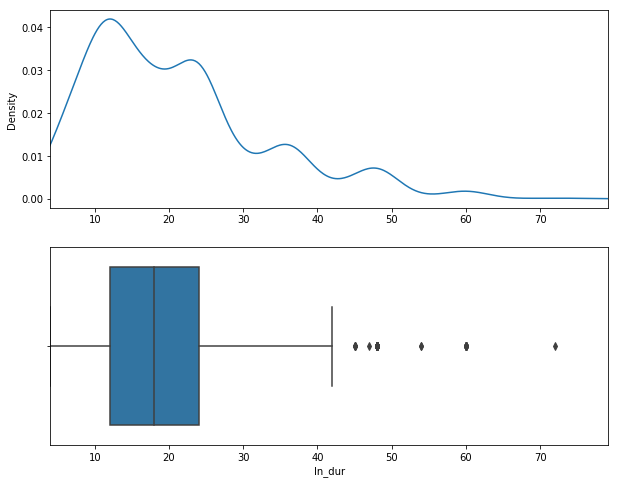

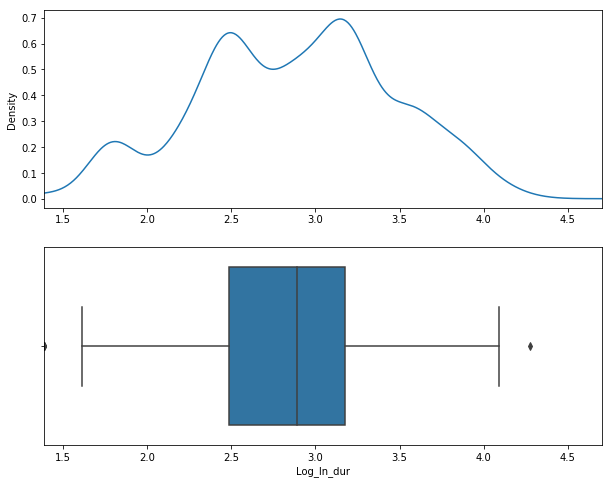

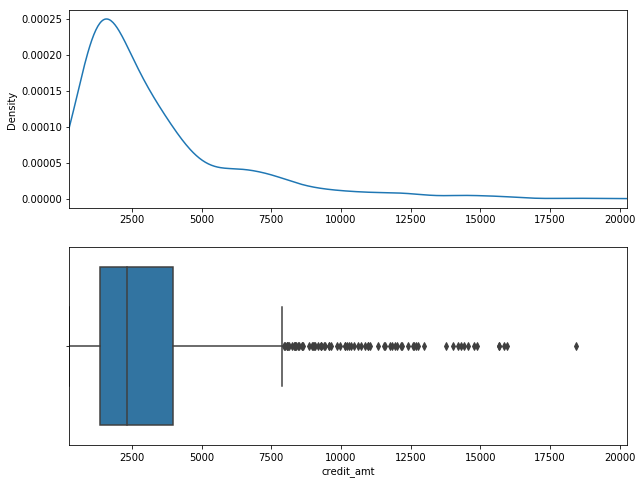

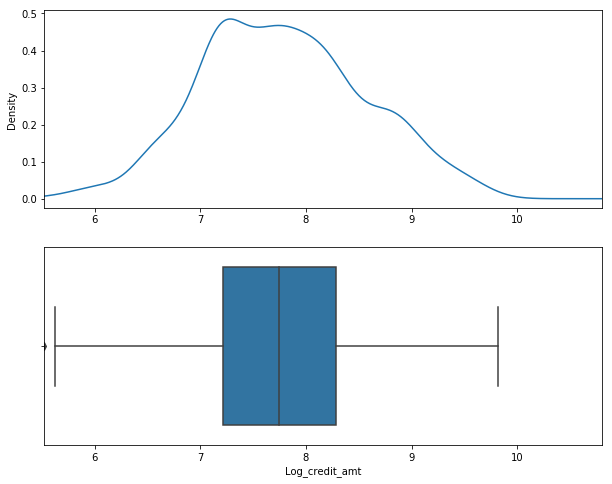

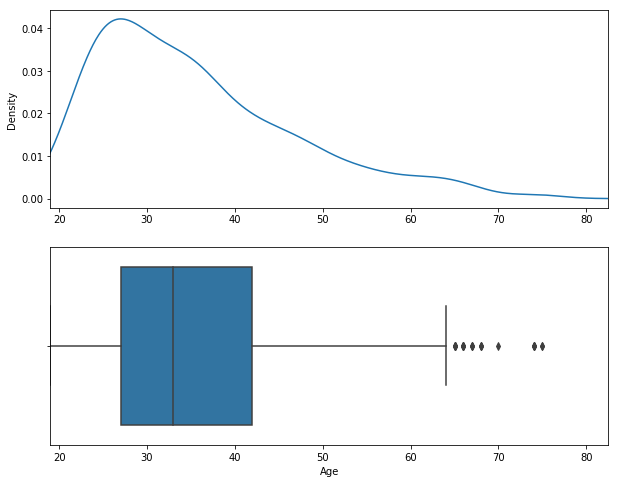

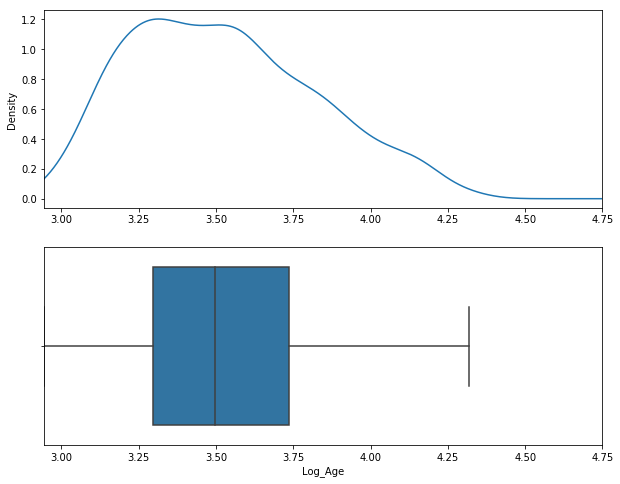

In [56]:
# outlier detection and treatment

import numpy as np

import seaborn as sns
df = dataset

for i in ['ln_dur', 'credit_amt', 'Age']:
    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    ax = df[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])
    # Remove any zeros (otherwise we get (-inf)
    df.loc[df.credit_amt == 0, 'credit_amt'] = np.nan

    # Drop NA
    df.dropna(inplace=True)

    # Log Transform
    df['Log_' + i] = np.log(df[i])


    j = 'Log_'+i

    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.xlim(df[j].min(), df[j].max()*1.1)

    ax = df[j].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[j].min(), df[j].max()*1.1)

    sns.boxplot(x=df[j])

In [94]:
# data description numeric data
df_new = df[['acc_status', 'credit_hist','cash',
       'emp_status', 'ins_rate', 'mar_gen', 'reference', 'yr_curr_res',
       'asset_2','house_type', 'existing_ln_bk', 'job_type', 'phone',
       'forn_wker', 'target', 'Log_credit_amt', 'Log_ln_dur', 'Log_Age']]

df_new.describe()

,ins_rate,yr_curr_res,existing_ln_bk,phone,forn_wker,target,Log_credit_amt,Log_ln_dur,Log_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.973000,2.845000,1.407000,0.404000,0.963000,0.700000,7.788691,2.877018,3.524306
std,1.118715,1.103718,0.577654,0.490943,0.188856,0.458487,0.776474,0.582240,0.299747
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.521461,1.386294,2.944439
25%,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,7.219276,2.484907,3.295837
50%,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,7.749107,2.890372,3.496508
75%,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,8.287088,3.178054,3.737670
max,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,9.821409,4.276666,4.317488


In [62]:
X_v1 = df_new[['acc_status', 'credit_hist','cash',
       'emp_status', 'ins_rate', 'mar_gen', 'reference', 'yr_curr_res',
       'asset_2','house_type', 'existing_ln_bk', 'job_type', 'phone',
       'forn_wker', 'Log_credit_amt', 'Log_ln_dur', 'Log_Age']]
Y = df_new.target

In [119]:
X = pd.get_dummies(df_new)
X.columns

Index(['ins_rate', 'yr_curr_res', 'existing_ln_bk', 'phone', 'forn_wker',
       'target', 'Log_credit_amt', 'Log_ln_dur', 'Log_Age', 'acc_status_0_0',
       'acc_status_0_200', 'acc_status_200+', 'acc_status_no_acc',
       'credit_hist_bad', 'credit_hist_good', 'credit_hist_great',
       'cash_0_100', 'cash_1000+', 'cash_100_500', 'cash_500_1000',
       'cash_none', 'emp_status_0_0', 'emp_status_0_1', 'emp_status_1_4',
       'emp_status_4_7', 'emp_status_7+', 'mar_gen_F', 'mar_gen_M',
       'reference_co_app', 'reference_gaurant', 'reference_none',
       'asset_2_car', 'asset_2_life_ins', 'asset_2_none',
       'asset_2_real_estate', 'house_type_free', 'house_type_own',
       'house_type_rent', 'job_type_highly_skill', 'job_type_skilled_emp',
       'job_type_unemp', 'job_type_unskilled_emp'],
      dtype='object')

In [81]:
# response distribution

Y.value_counts()

1    700
0    300
Name: target, dtype: int64

In [107]:
##variance of response by independent variables


col = ['ins_rate', 'yr_curr_res', 'existing_ln_bk', 'phone', 'forn_wker',
       'acc_status_0_0','acc_status_0_200', 'acc_status_200+', 'acc_status_no_acc',
       'credit_hist_bad', 'credit_hist_good', 'credit_hist_great',
       'cash_0_100', 'cash_1000+', 'cash_100_500', 'cash_500_1000',
       'cash_none', 'emp_status_0_0', 'emp_status_0_1', 'emp_status_1_4',
       'emp_status_4_7', 'emp_status_7+', 'mar_gen_F', 'mar_gen_M',
       'reference_co_app', 'reference_gaurant', 'reference_none',
       'asset_2_car', 'asset_2_life_ins', 'asset_2_none',
       'asset_2_real_estate', 'house_type_free', 'house_type_own',
       'house_type_rent', 'job_type_highly_skill', 'job_type_skilled_emp',
       'job_type_unemp', 'job_type_unskilled_emp']
      
for i in col:
    print(X.groupby([i,'target']).target.size())

ins_rate  target
1         0          34
          1         102
2         0          62
          1         169
3         0          45
          1         112
4         0         159
          1         317
Name: target, dtype: int64
yr_curr_res  target
1            0          36
             1          94
2            0          97
             1         211
3            0          43
             1         106
4            0         124
             1         289
Name: target, dtype: int64
existing_ln_bk  target
1               0         200
                1         433
2               0          92
                1         241
3               0           6
                1          22
4               0           2
                1           4
Name: target, dtype: int64
phone  target
0      0         187
       1         409
1      0         113
       1         291
Name: target, dtype: int64
forn_wker  target
0          0           4
           1          33
1          0      

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


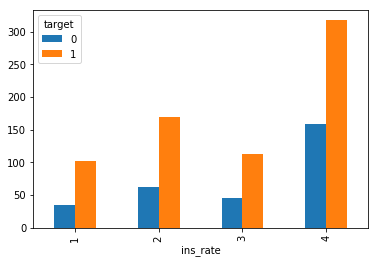

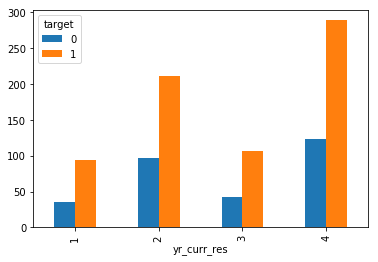

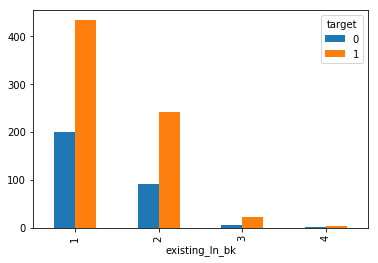

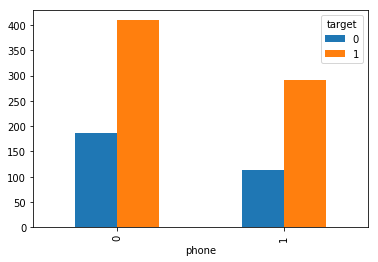

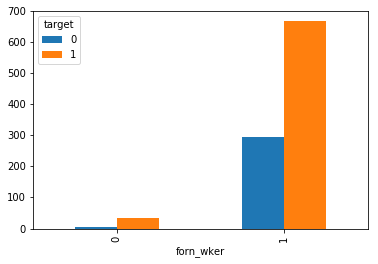

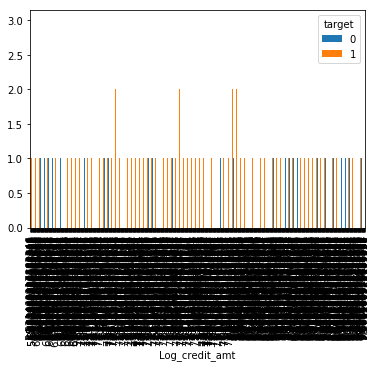

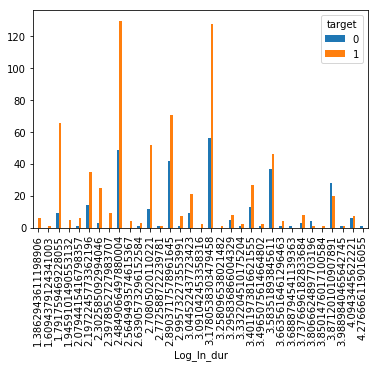

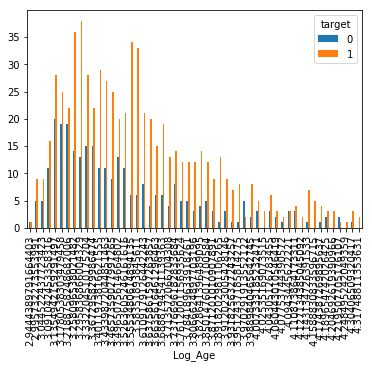

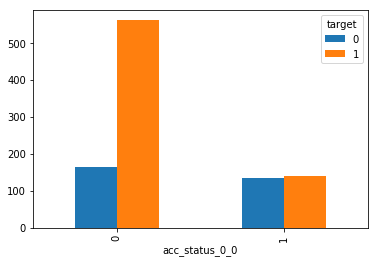

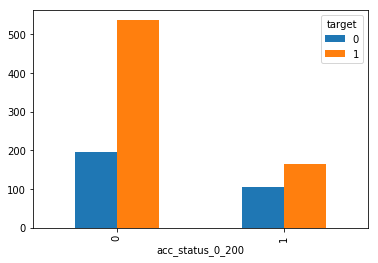

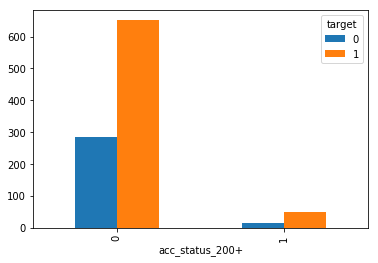

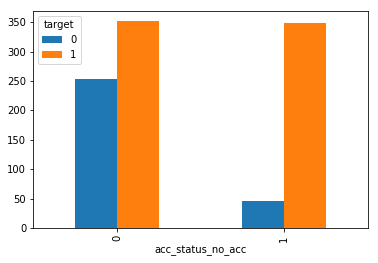

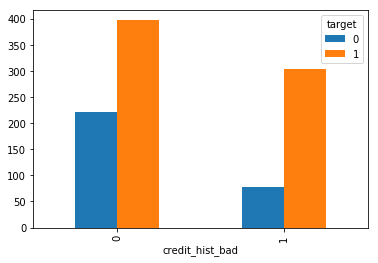

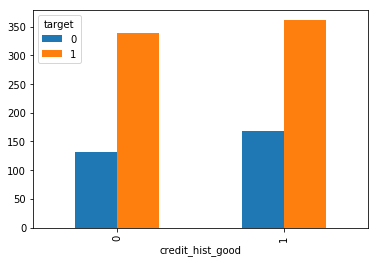

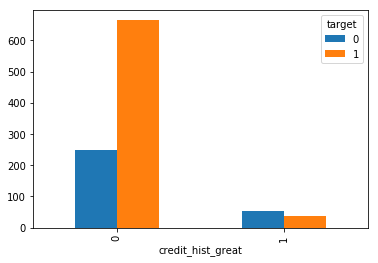

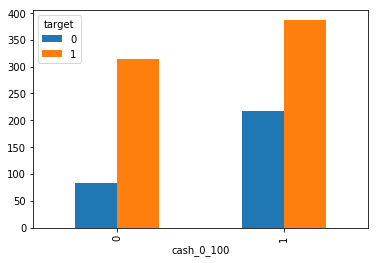

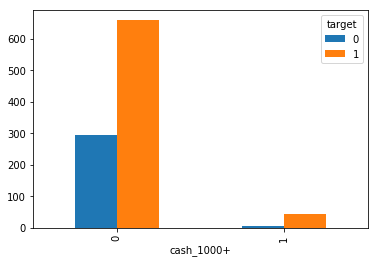

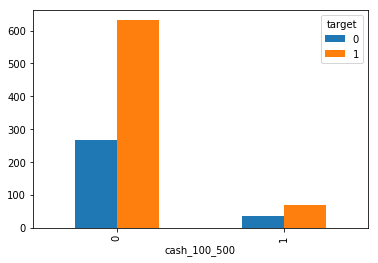

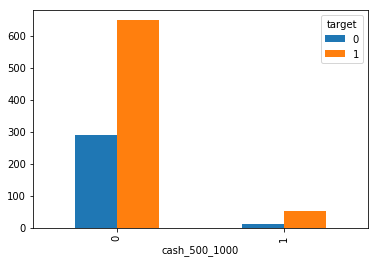

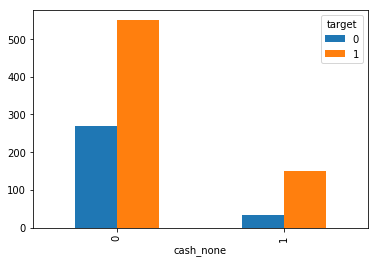

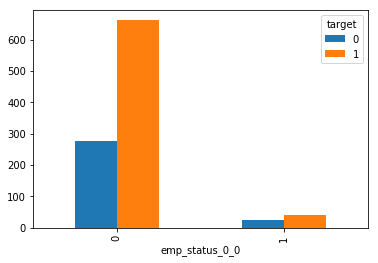

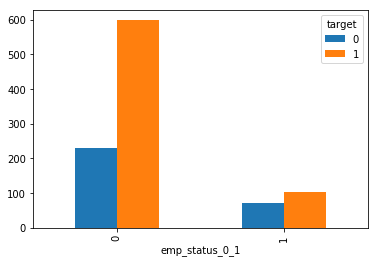

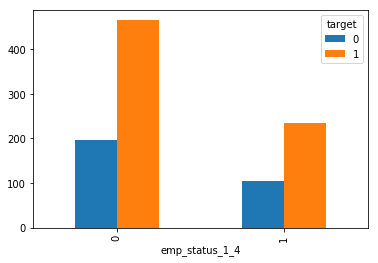

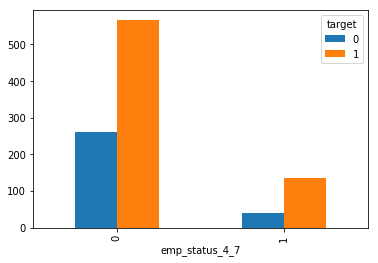

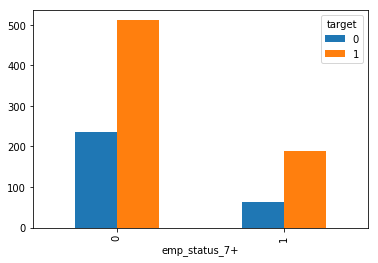

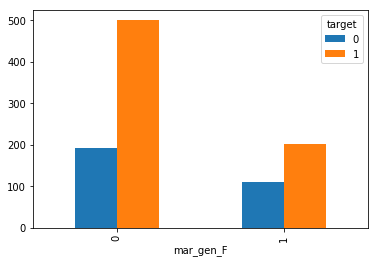

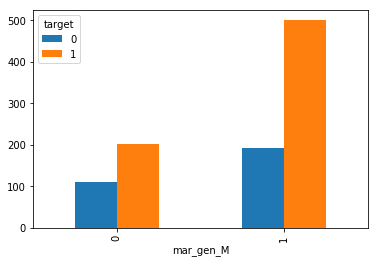

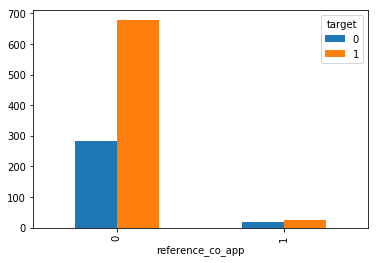

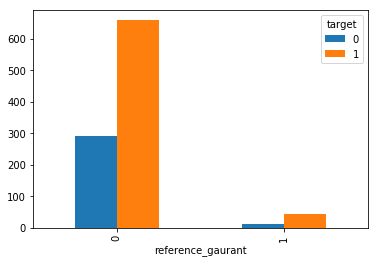

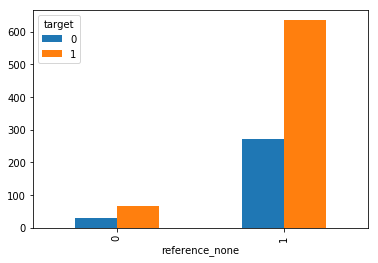

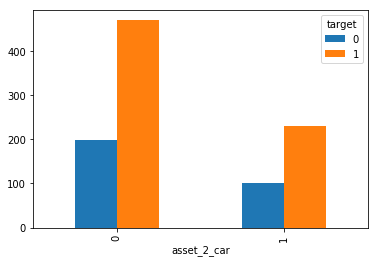

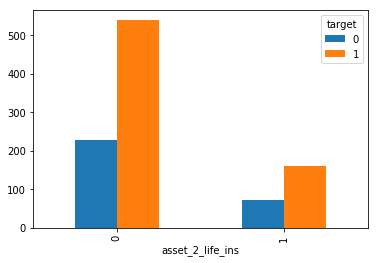

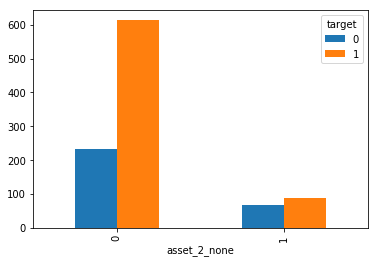

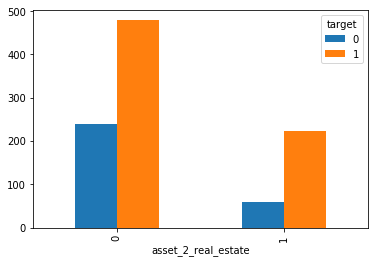

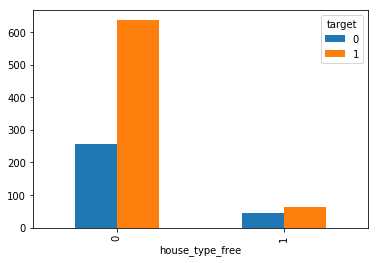

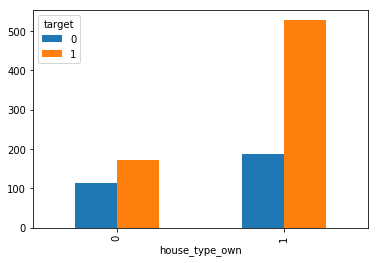

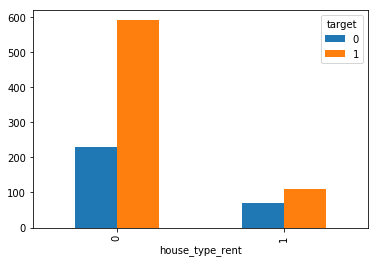

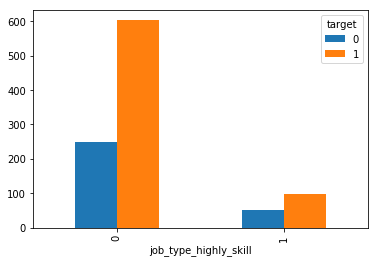

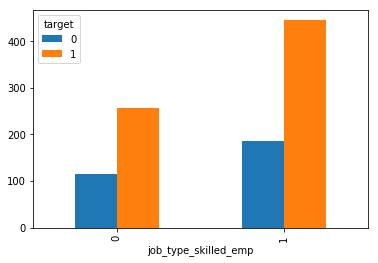

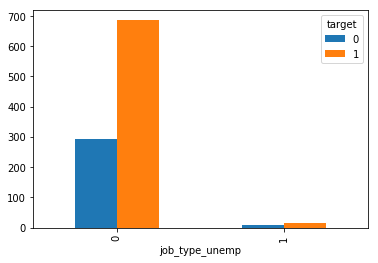

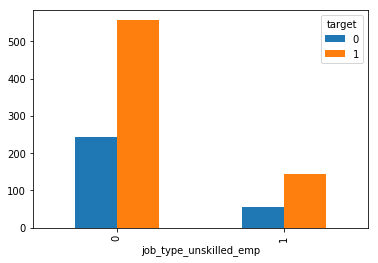

In [101]:
###variance of response by independent variables


col = ['ins_rate', 'yr_curr_res', 'existing_ln_bk', 'phone', 'forn_wker',
       'Log_credit_amt', 'Log_ln_dur', 'Log_Age', 'acc_status_0_0',
       'acc_status_0_200', 'acc_status_200+', 'acc_status_no_acc',
       'credit_hist_bad', 'credit_hist_good', 'credit_hist_great',
       'cash_0_100', 'cash_1000+', 'cash_100_500', 'cash_500_1000',
       'cash_none', 'emp_status_0_0', 'emp_status_0_1', 'emp_status_1_4',
       'emp_status_4_7', 'emp_status_7+', 'mar_gen_F', 'mar_gen_M',
       'reference_co_app', 'reference_gaurant', 'reference_none',
       'asset_2_car', 'asset_2_life_ins', 'asset_2_none',
       'asset_2_real_estate', 'house_type_free', 'house_type_own',
       'house_type_rent', 'job_type_highly_skill', 'job_type_skilled_emp',
       'job_type_unemp', 'job_type_unskilled_emp']
      
for i in col:
    X.groupby([i,'target']).target.count().unstack().plot(kind = 'bar')


In [ ]:
#defaulted customers in the past 6 months

X[X.default_flag == 1].customers.value_counts()

In [143]:
# Feature Selection with Univariate Statistical Tests (Chi-squared for classification)


import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
X_ind = X[['ins_rate', 'yr_curr_res', 'existing_ln_bk', 'phone', 'forn_wker',
       'Log_credit_amt', 'Log_ln_dur', 'Log_Age', 'acc_status_0_0',
       'acc_status_0_200', 'acc_status_200+', 'acc_status_no_acc',
       'credit_hist_bad', 'credit_hist_good', 'credit_hist_great',
       'cash_0_100', 'cash_1000+', 'cash_100_500', 'cash_500_1000',
       'cash_none', 'emp_status_0_0', 'emp_status_0_1', 'emp_status_1_4',
       'emp_status_4_7', 'emp_status_7+', 'mar_gen_F', 'mar_gen_M',
       'reference_co_app', 'reference_gaurant', 'reference_none',
       'asset_2_car', 'asset_2_life_ins', 'asset_2_none',
       'asset_2_real_estate', 'house_type_free', 'house_type_own',
       'house_type_rent', 'job_type_highly_skill', 'job_type_skilled_emp',
       'job_type_unemp', 'job_type_unskilled_emp']]
Y = X['target']
# feature extraction
test = SelectKBest(score_func=chi2, k=25)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

imp_feature = pd.DataFrame(fit.scores_,index = X.columns)
imp_feature.sort_values(0,ascending=False)

[2.205e+00 3.766e-03 4.955e-01 7.926e-01 2.493e-01 3.000e+02 9.284e-01
 5.440e+00 2.688e-01 4.845e+01 1.045e+01 1.815e+00 6.300e+01 1.647e+01
 8.985e-01 3.701e+01 1.029e+01 7.000e+00 4.443e-01 4.717e+00 1.365e+01
 1.487e+00 9.373e+00 7.431e-02 4.768e+00 2.665e+00 3.932e+00 1.767e+00
 3.774e+00 2.872e+00 5.250e-05 8.262e-02 4.023e-02 1.338e+01 1.022e+01
 5.933e+00 5.199e+00 7.068e+00 1.402e+00 6.803e-02 3.463e-02 3.810e-01]
[[4.    1.    1.792 1.    0.    0.    0.    1.    0.    0.    0.    0.
  1.    0.    0.    1.    0.    1.    0.    0.    0.    1.    0.    1.
  0.   ]
 [2.    0.    3.871 0.    1.    0.    0.    0.    0.    1.    0.    0.
  0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    0.    1.
  0.   ]
 [2.    1.    2.485 0.    0.    0.    1.    1.    0.    1.    0.    0.
  0.    0.    1.    0.    0.    1.    0.    0.    0.    1.    0.    1.
  0.   ]
 [2.    1.    3.738 1.    0.    0.    0.    0.    0.    1.    0.    0.
  0.    0.    1.    0.    0.    1.    0.    1.   

,0
target,300.000000
acc_status_no_acc,63.002659
acc_status_0_0,48.450469
credit_hist_great,37.008561
credit_hist_bad,16.469066
cash_none,13.645850
asset_2_none,13.377860
acc_status_0_200,10.453001
cash_0_100,10.291479
asset_2_real_estate,10.218845


In [189]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_ind, Y, test_size = 0.20, random_state = 42)
C = [i for i in np.arange(.001,.11,.01)]

random_grid = {'C':C}

logreg = LogisticRegression(penalty='l1', fit_intercept=True)

logreg_random = model_selection.GridSearchCV(estimator = logreg, param_grid = random_grid, 
                             cv = 5, n_jobs = -1, scoring = 'roc_auc')

In [190]:
logreg_random.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.011, 0.020999999999999998, 0.030999999999999996, 0.040999999999999995, 0.05099999999999999, 0.06099999999999999, 0.071, 0.08099999999999999, 0.09099999999999998, 0.10099999999999998]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [191]:
logreg_random.best_estimator_

LogisticRegression(C=0.10099999999999998, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [192]:
logreg_random.best_score_

0.750027995150763

In [193]:
logreg_random.best_params_

{'C': 0.10099999999999998}

In [194]:
logreg_new = LogisticRegression(penalty='l1', C= 0.10098,  fit_intercept=True)

In [195]:
logreg_new.fit(X_train,Y_train)

LogisticRegression(C=0.10098, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [223]:
Y_pred_proba = logreg_new.predict_proba(X_test)
a = [x[1] for x in Y_pred_proba]

Y_pred = [1 if i > .6 else 0 for i in a]


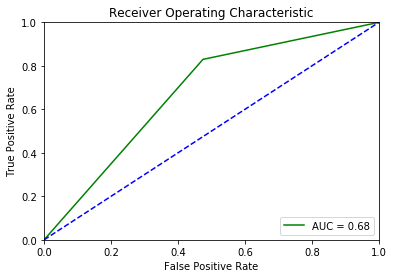

In [224]:
probs = logreg_new.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [225]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc

confusion_matrix(Y_test,Y_pred)

array([[ 31,  28],
       [ 24, 117]], dtype=int64)

In [226]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Y_test,Y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[ 31  28]
 [ 24 117]]
Accuracy :  0.74
Sensitivity :  0.5254237288135594
Specificity :  0.8297872340425532


Confusion matrix, without normalization
[[ 31  28]
 [ 24 117]]


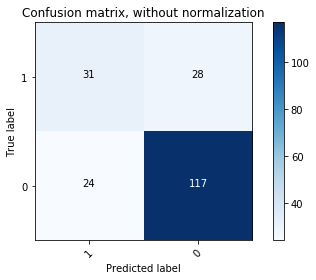

In [227]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0],
                      title='Confusion matrix, without normalization')

plt.show()